# Heart Disease Prediction Using Pyspark

## Connection to Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing SparkSession & Initialization

In [9]:
from pyspark.sql import SparkSession  # Import SparkSession
try:
    sc.stop()
except:
    pass

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Heart Disease Classification") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.cores", "2") \
    .config("spark.default.parallelism", "4") \
    .config("spark.sql.shuffle.partitions", "4") \
    .getOrCreate()

print("SparkSession Initialized:", spark)


SparkSession Initialized: <pyspark.sql.session.SparkSession object at 0x7d6f1b2397b0>


## Data Importing and Visualization

In [10]:

from scipy.io import arff
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("ReadARFFExample").getOrCreate()

# Step 1: Load ARFF file using scipy.io.arff
data, meta = arff.loadarff('/content/drive/MyDrive/DDA Project 2024/BNG_heart-statlog.arff')

# Step 2: Convert the ARFF data into a Pandas DataFrame
df = pd.DataFrame(data)

# Step 3: Convert the Pandas DataFrame into a PySpark DataFrame
spark_df = spark.createDataFrame(df)

# Step 4: Show the PySpark DataFrame
spark_df.show()

# Step 5: Print the schema of the PySpark DataFrame
spark_df.printSchema()


+---------+---+--------+----------------------+-----------------+-------------------+------------------------------------+---------------------------+-----------------------+--------+-----+-----------------------+----+--------------------+
|      age|sex|   chest|resting_blood_pressure|serum_cholestoral|fasting_blood_sugar|resting_electrocardiographic_results|maximum_heart_rate_achieved|exercise_induced_angina| oldpeak|slope|number_of_major_vessels|thal|               class|
+---------+---+--------+----------------------+-----------------+-------------------+------------------------------------+---------------------------+-----------------------+--------+-----+-----------------------+----+--------------------+
|53.494725|1.0|1.150395|            117.978412|        242.00937|                0.0|                                 0.0|                 133.361344|                    0.0|3.089391|  2.0|                    1.0| 3.0|[70 72 65 73 65 6...|
|37.320375|0.0|1.887693|             118

# Data Pre-Processing

## Data Transformation (for class column)

In [11]:
# Step 3: Decode byte strings in the Pandas DataFrame
for col in df.select_dtypes([object]):  # Select columns with object dtype (potentially byte strings)
    df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Step 4: Convert Pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(df)

# Step 5: Show the data (optional)
spark_df.show()

# Step 6: Perform further operations with the Spark DataFrame
# Example: spark_df.printSchema()


+---------+---+--------+----------------------+-----------------+-------------------+------------------------------------+---------------------------+-----------------------+--------+-----+-----------------------+----+-------+
|      age|sex|   chest|resting_blood_pressure|serum_cholestoral|fasting_blood_sugar|resting_electrocardiographic_results|maximum_heart_rate_achieved|exercise_induced_angina| oldpeak|slope|number_of_major_vessels|thal|  class|
+---------+---+--------+----------------------+-----------------+-------------------+------------------------------------+---------------------------+-----------------------+--------+-----+-----------------------+----+-------+
|53.494725|1.0|1.150395|            117.978412|        242.00937|                0.0|                                 0.0|                 133.361344|                    0.0|3.089391|  2.0|                    1.0| 3.0|present|
|37.320375|0.0|1.887693|             118.45567|       218.156844|                1.0|       

## Data Type To Understand the Data

In [ ]:
# Initialize Spark session
spark = SparkSession.builder.appName("Pandas to PySpark").getOrCreate()

# Assuming `df` is a Pandas DataFrame
pyspark_df = spark.createDataFrame(df)

# Now, access the schema
columns_info = [(field.name, field.dataType) for field in pyspark_df.schema]
for column, dtype in columns_info:
    print(f"Column: {column}, Data Type: {dtype}")




Column: age, Data Type: DoubleType()
Column: sex, Data Type: DoubleType()
Column: chest, Data Type: DoubleType()
Column: resting_blood_pressure, Data Type: DoubleType()
Column: serum_cholestoral, Data Type: DoubleType()
Column: fasting_blood_sugar, Data Type: DoubleType()
Column: resting_electrocardiographic_results, Data Type: DoubleType()
Column: maximum_heart_rate_achieved, Data Type: DoubleType()
Column: exercise_induced_angina, Data Type: DoubleType()
Column: oldpeak, Data Type: DoubleType()
Column: slope, Data Type: DoubleType()
Column: number_of_major_vessels, Data Type: DoubleType()
Column: thal, Data Type: DoubleType()
Column: class, Data Type: StringType()


## Data Cleaning (float to INT for categorical variable and Age)

In [12]:
from pyspark.sql.functions import round as pyspark_round, col

# Round and convert following columns to integers in PySpark
spark_df = spark_df.withColumn("age", pyspark_round(col("age")).cast("int"))
spark_df = spark_df.withColumn("chest", pyspark_round(col("chest")).cast("int"))
spark_df = spark_df.withColumn("sex", pyspark_round(col("sex")).cast("int"))
spark_df = spark_df.withColumn("fasting_blood_sugar", pyspark_round(col("fasting_blood_sugar")).cast("int"))
spark_df = spark_df.withColumn("resting_electrocardiographic_results", pyspark_round(col("resting_electrocardiographic_results")).cast("int"))
spark_df = spark_df.withColumn("exercise_induced_angina", pyspark_round(col("exercise_induced_angina")).cast("int"))
spark_df = spark_df.withColumn("slope", pyspark_round(col("slope")).cast("int"))
spark_df = spark_df.withColumn("number_of_major_vessels", pyspark_round(col("number_of_major_vessels")).cast("int"))
spark_df = spark_df.withColumn("thal", pyspark_round(col("thal")).cast("int"))
# Show the updated DataFrame
spark_df.show()




+---+---+-----+----------------------+-----------------+-------------------+------------------------------------+---------------------------+-----------------------+--------+-----+-----------------------+----+-------+
|age|sex|chest|resting_blood_pressure|serum_cholestoral|fasting_blood_sugar|resting_electrocardiographic_results|maximum_heart_rate_achieved|exercise_induced_angina| oldpeak|slope|number_of_major_vessels|thal|  class|
+---+---+-----+----------------------+-----------------+-------------------+------------------------------------+---------------------------+-----------------------+--------+-----+-----------------------+----+-------+
| 53|  1|    1|            117.978412|        242.00937|                  0|                                   0|                 133.361344|                      0|3.089391|    2|                      1|   3|present|
| 37|  0|    2|             118.45567|       218.156844|                  1|                                   2|               

## Data Encoding (for class column)

In [13]:
from pyspark.sql.functions import when, col

# Modify the 'class' column to have 1 for 'present' and 0 for 'absent'
spark_df = spark_df.withColumn("class", when(col("class") == "present", 1).otherwise(0))

# Show the updated DataFrame
spark_df.show()


+---+---+-----+----------------------+-----------------+-------------------+------------------------------------+---------------------------+-----------------------+--------+-----+-----------------------+----+-----+
|age|sex|chest|resting_blood_pressure|serum_cholestoral|fasting_blood_sugar|resting_electrocardiographic_results|maximum_heart_rate_achieved|exercise_induced_angina| oldpeak|slope|number_of_major_vessels|thal|class|
+---+---+-----+----------------------+-----------------+-------------------+------------------------------------+---------------------------+-----------------------+--------+-----+-----------------------+----+-----+
| 53|  1|    1|            117.978412|        242.00937|                  0|                                   0|                 133.361344|                      0|3.089391|    2|                      1|   3|    1|
| 37|  0|    2|             118.45567|       218.156844|                  1|                                   2|                 148.45

## Exploratory Data Analysis

## Importing Important Libraries

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Correlation Matrics

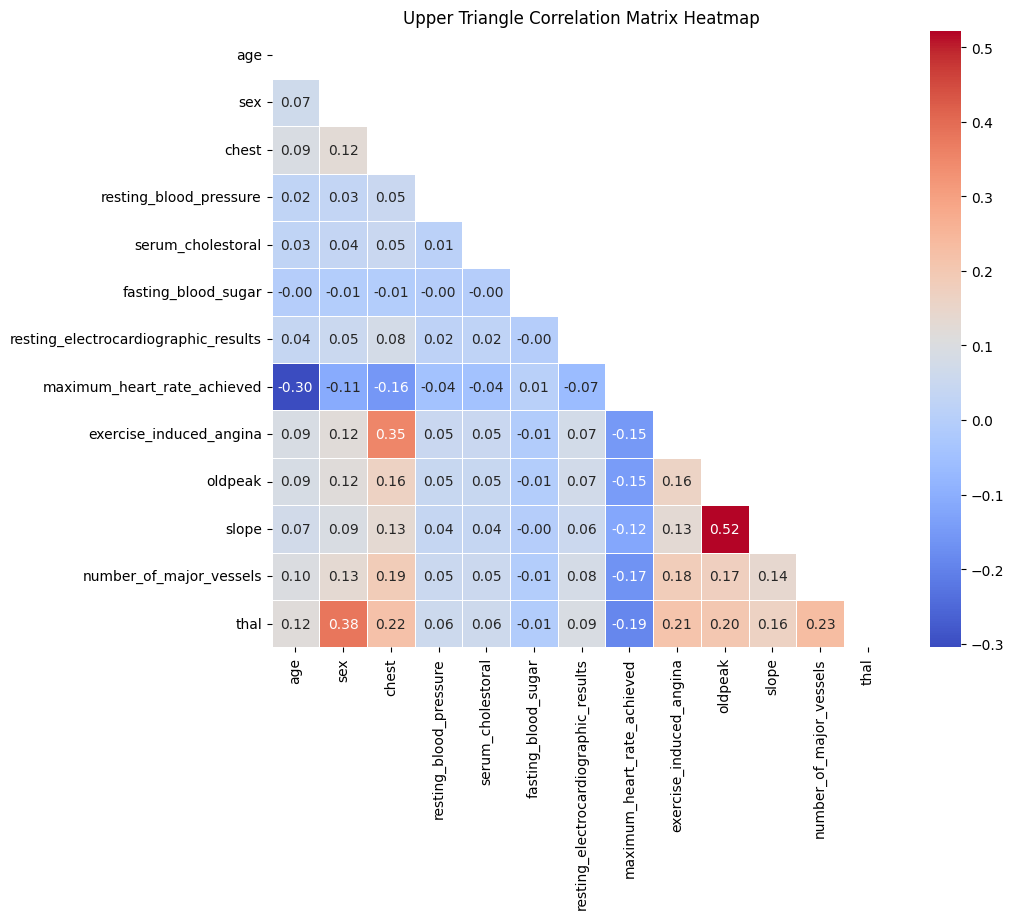

In [ ]:
# Step 1: Select only numeric columns for correlation
numeric_cols = [col for col, dtype in spark_df.dtypes if dtype in ['int', 'double']]

# Step 2: Assemble the numeric columns into a single vector column
vector_assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")

# Step 3: Transform the DataFrame to create a 'features' column with all numeric data combined
df_with_features = vector_assembler.transform(spark_df)

# Step 4: Compute the correlation matrix using the 'features' column
correlation_matrix = Correlation.corr(df_with_features, "features", method="pearson").head()

# Step 5: Get the correlation matrix as a DenseMatrix and convert it to a Pandas DataFrame
correlation_matrix = correlation_matrix[0].toArray()

# Step 6: Create a Pandas DataFrame for better handling
correlation_df = pd.DataFrame(correlation_matrix, columns=numeric_cols, index=numeric_cols)

# Step 7: Mask the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_df, dtype=bool))

# Step 8: Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)

# Step 9: Display the heatmap
plt.title('Upper Triangle Correlation Matrix Heatmap')
plt.show()


## Disttribution Analysis of each feature

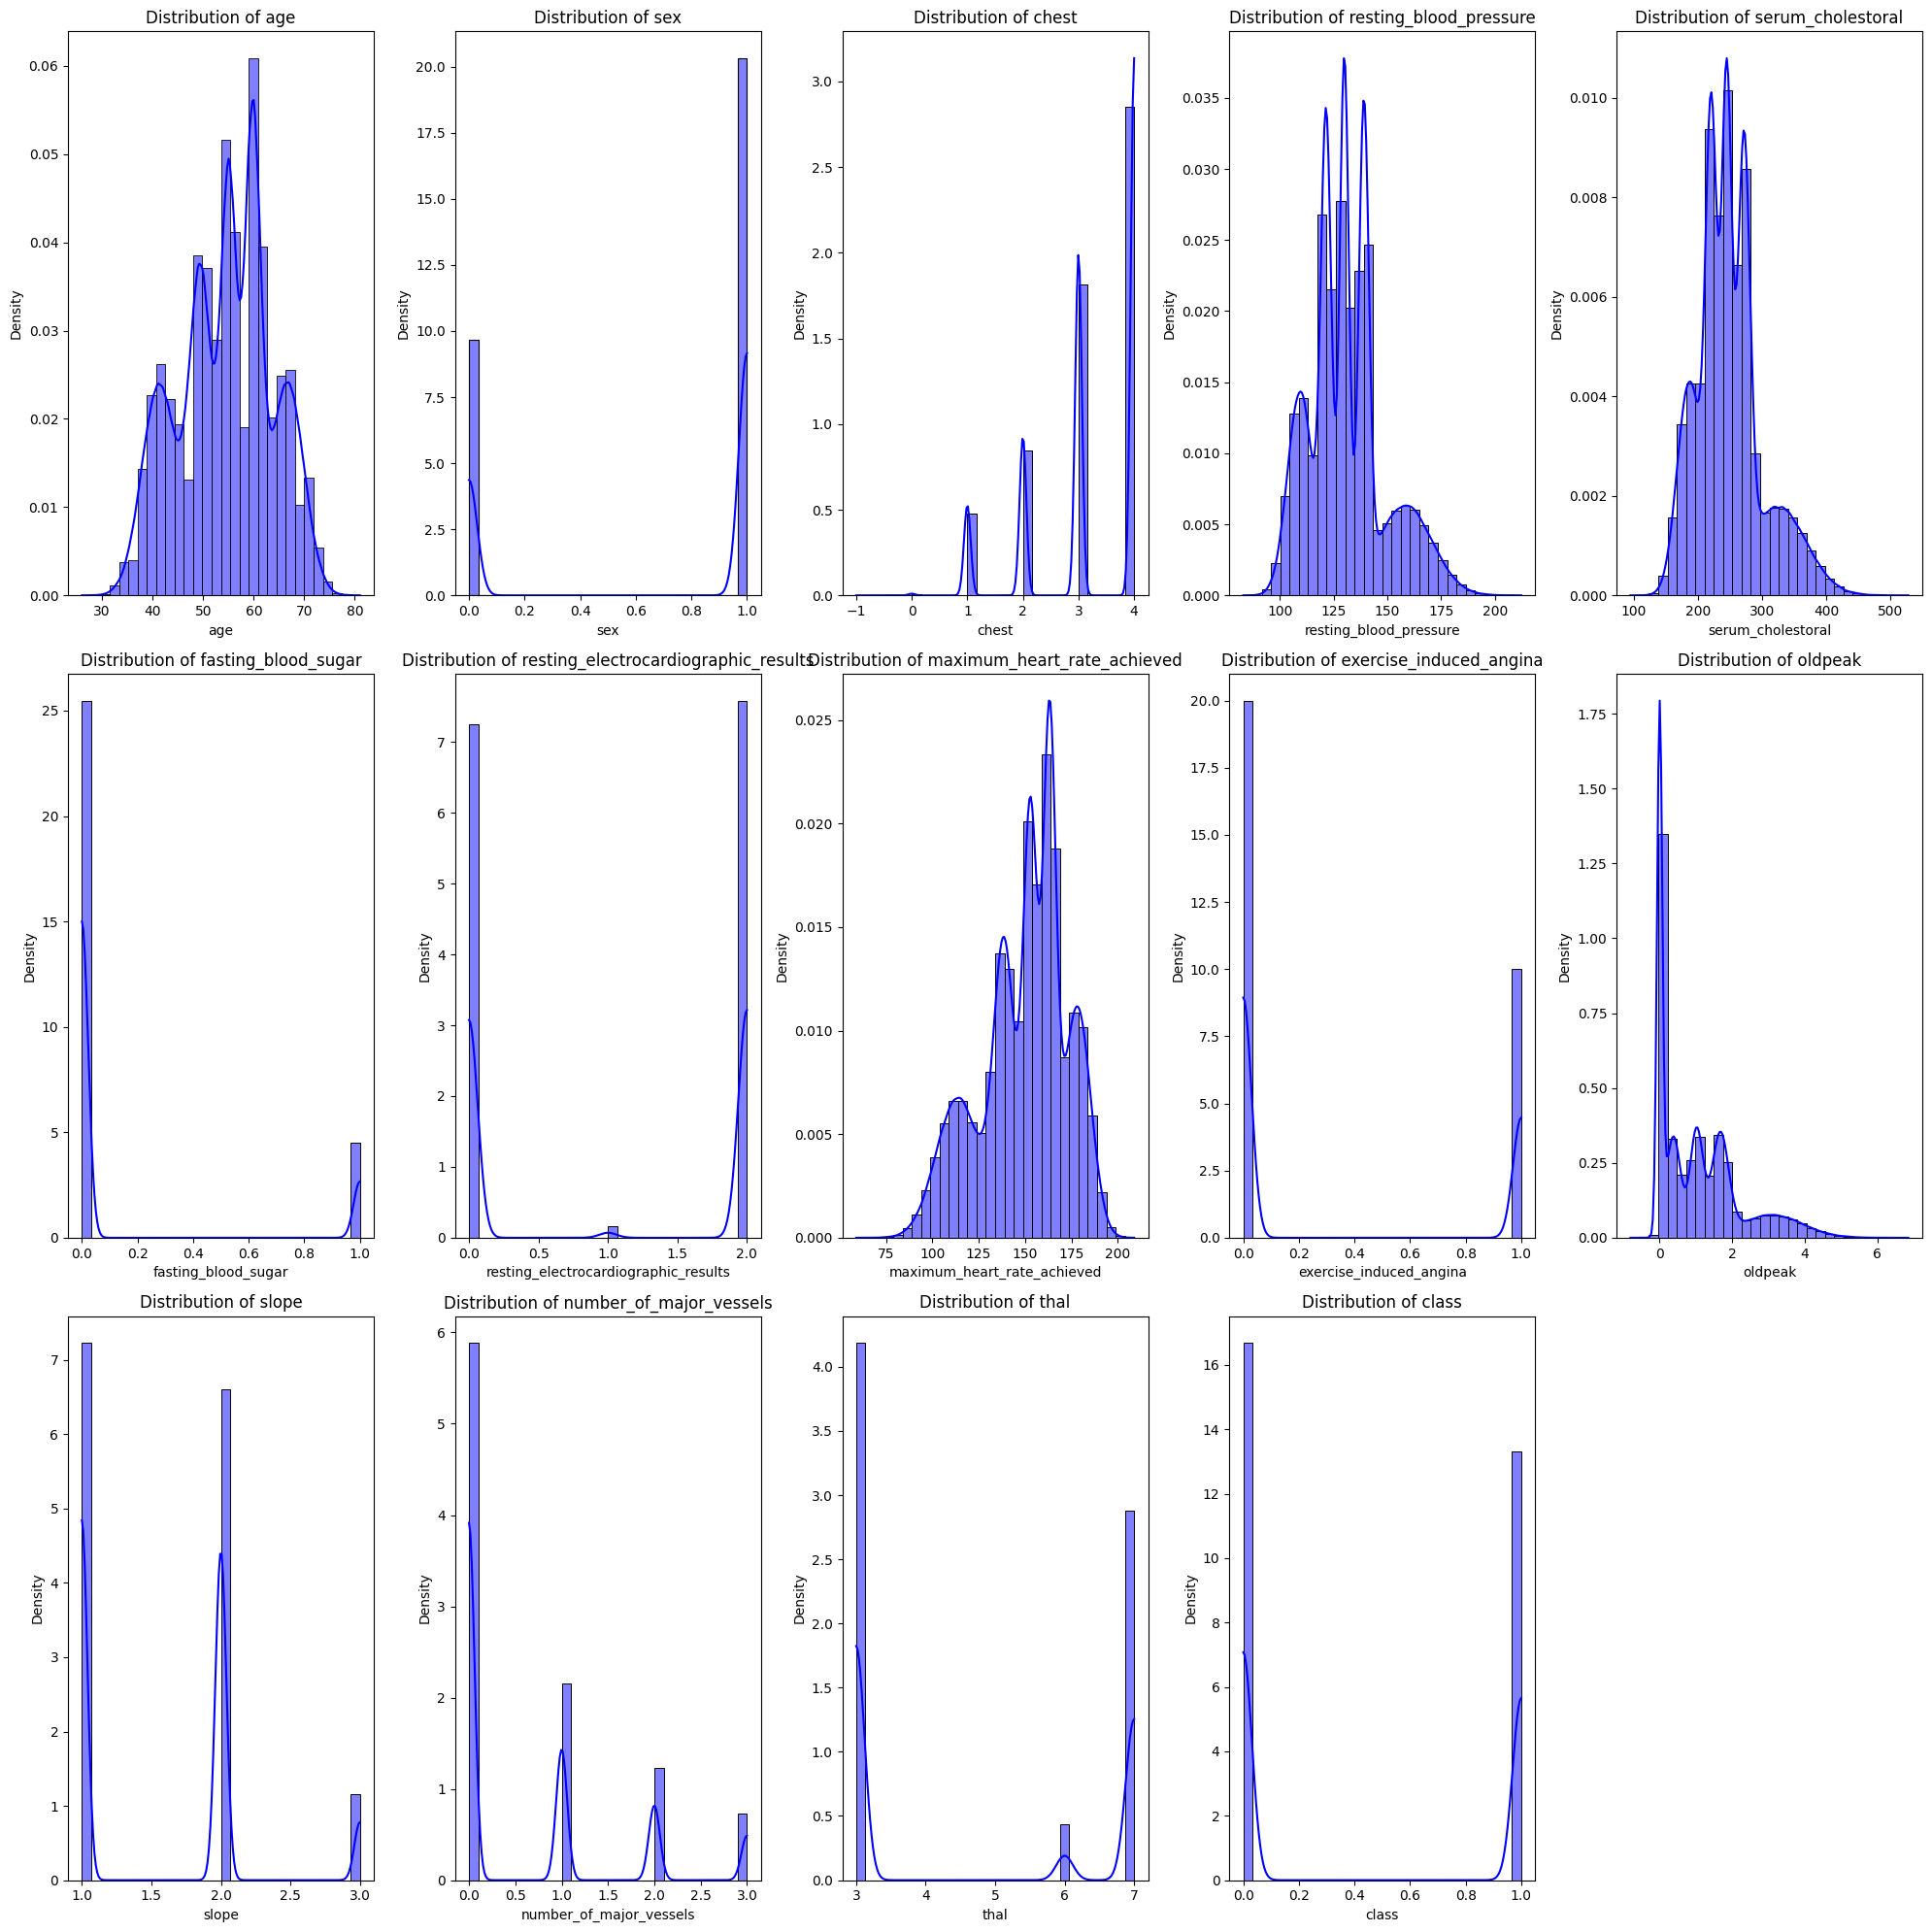

In [ ]:


# Step 1: Convert the PySpark DataFrame to Pandas DataFrame
numeric_cols = [col for col, dtype in spark_df.dtypes if dtype in ['int', 'double']]
pandas_df = spark_df.select(numeric_cols).toPandas()

# Step 2: Plot the distribution of each numeric column using histograms and KDE
plt.figure(figsize=(20, 20))

# Loop through each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, len(numeric_cols) // 3 + 1, i)  # Arrange subplots
    sns.histplot(pandas_df[col], kde=True, bins=30, color='blue', stat='density')  # KDE and histogram
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


## Role of Age into Heart Disease

In [ ]:
from pyspark.sql.functions import corr

correlation = spark_df.select(corr("age", "class").alias("correlation")).collect()[0]["correlation"]
print(f"Correlation between Age and Heart Disease Presence: {correlation}")



Correlation between Age and Heart Disease Presence: 0.22259851454307378


## Binning The age into groups

In [ ]:
from pyspark.sql.functions import when, col

# Create age group column
spark_df = spark_df.withColumn(
    "age_group",
    when(col("age") < 30, "<30")
    .when((col("age") >= 30) & (col("age") < 40), "30-39")
    .when((col("age") >= 40) & (col("age") < 50), "40-49")
    .when((col("age") >= 50) & (col("age") < 60), "50-59")
    .when((col("age") >= 60) & (col("age") < 70), "60-69")
    .otherwise("70+")
)



In [ ]:
spark_df.groupBy("age_group", "class").count().orderBy("age_group").show()


+---------+-----+------+
|age_group|class| count|
+---------+-----+------+
|    30-39|    0| 47562|
|    30-39|    1| 14558|
|    40-49|    0|172298|
|    40-49|    1| 69137|
|    50-59|    1|183438|
|    50-59|    0|194994|
|    60-69|    1|158817|
|    60-69|    0|121314|
|      70+|    1| 18094|
|      70+|    0| 19736|
|      <30|    1|    10|
|      <30|    0|    42|
+---------+-----+------+



## Distribution of Target variable

In [ ]:
# Group by the class column and count occurrences
class_counts = spark_df.groupBy("class").count()
class_counts.show()


+-----+------+
|class| count|
+-----+------+
|    1|444054|
|    0|555946|
+-----+------+



In [ ]:
# Convert the PySpark DataFrame to a Pandas DataFrame
class_counts_pd = class_counts.toPandas()

# Show the Pandas DataFrame (optional)
class_counts_pd


,class,count
0,1,444054
1,0,555946


## Visualization & interactive Graphs for Better Insights of our Target variable

In [ ]:
import plotly.express as px

# Create a bar plot using Plotly with custom size and color
fig = px.bar(class_counts_pd, x='class', y='count',
             labels={'class': 'Heart Disease Class', 'count': 'Count'},
             title='Count of Heart Disease Classes')

# Set custom width and height for the plot
fig.update_layout(
    width=400,  # Width of the plot
    height=500  # Height of the plot
)

# Update the color of the bars (Green for no disease, Red for disease)
fig.update_traces(marker=dict(color=['#FFCCCB','#90EE90']))  # Green and Red

# Show the interactive plot
fig.show()


## Demographic of Class by Age using Spark

In [ ]:
# Count class occurrences grouped by age group and class
age_class_counts = spark_df.groupBy("age", "class").count().orderBy("age")
age_class_counts.show()


+---+-----+-----+
|age|class|count|
+---+-----+-----+
| 26|    0|    1|
| 27|    0|    2|
| 28|    1|    4|
| 28|    0|   11|
| 29|    0|   28|
| 29|    1|    6|
| 30|    1|   20|
| 30|    0|   78|
| 31|    1|   62|
| 31|    0|  189|
| 32|    0|  476|
| 32|    1|  155|
| 33|    0| 1032|
| 33|    1|  330|
| 34|    0| 1841|
| 34|    1|  564|
| 35|    0| 3507|
| 35|    1| 1010|
| 36|    1| 1742|
| 36|    0| 5575|
+---+-----+-----+
only showing top 20 rows



## Demographic of Class by Sex using Spark


In [ ]:
# Group by 'class' and 'sex' and count the occurrences
class_sex_counts = spark_df.groupBy("sex", "class").count()

# Show the result
class_sex_counts.show()




+---+-----+------+
|sex|class| count|
+---+-----+------+
|  1|    0|308197|
|  0|    1| 75040|
|  0|    0|247749|
|  1|    1|369014|
+---+-----+------+



In [ ]:
# Convert to Pandas DataFrame
class_sex_counts_pd = class_sex_counts.toPandas()

# Show the Pandas DataFrame
class_sex_counts_pd


,sex,class,count
0,1,0,308197
1,0,1,75040
2,0,0,247749
3,1,1,369014


## Interactive Graph for Class by Sex

In [ ]:
# Create a bar plot using Plotly
fig = px.bar(class_sex_counts_pd, x='sex', y='count', color='class',
             labels={'sex': 'Sex', 'count': 'Count', 'class': 'Heart Disease Class'},
             title='Count of Heart Disease by Sex')

# Set custom width and height for the plot
fig.update_layout(
    width=800,  # Width of the plot
    height=500  # Height of the plot
)

# Show the interactive plot
fig.show()


## Demographic of Class by Age and Sex using Spark


In [ ]:
# Group by 'sex' and 'age' and count occurrences of each class
sex_age_class_counts = spark_df.groupBy("sex", "age", "class").count()

# Show the result
sex_age_class_counts.show()




+---+---+-----+-----+
|sex|age|class|count|
+---+---+-----+-----+
|  0| 60|    1| 6756|
|  1| 59|    0| 9726|
|  1| 69|    1| 7639|
|  0| 42|    0| 8095|
|  1| 45|    1| 3709|
|  0| 55|    1| 3968|
|  0| 53|    0| 7282|
|  1| 62|    1|13906|
|  1| 59|    1|29087|
|  0| 65|    0| 4992|
|  0| 64|    0| 4030|
|  0| 47|    1| 1363|
|  1| 58|    1|18334|
|  1| 46|    0| 7260|
|  1| 61|    1|24691|
|  1| 38|    0| 6516|
|  1| 67|    0| 6957|
|  0| 76|    0|   82|
|  1| 44|    0| 7932|
|  1| 49|    1|11269|
+---+---+-----+-----+
only showing top 20 rows



In [ ]:
# Convert to Pandas DataFrame
sex_age_class_counts_pd = sex_age_class_counts.toPandas()

# Show the Pandas DataFrame
sex_age_class_counts_pd.head()


,sex,age,class,count
0,0,60,1,6756
1,1,59,0,9726
2,1,69,1,7639
3,0,42,0,8095
4,1,45,1,3709


## Interactive Graph for better Understanding (class by Age and Sex)

In [ ]:
import plotly.express as px

# Create a grouped bar chart using Plotly
fig = px.bar(sex_age_class_counts_pd, x='age', y='count', color='sex',
             facet_col='class',  # Separate the chart by class (0 and 1)
             barmode='group',
             labels={'age': 'Age', 'count': 'Count', 'sex': 'Sex', 'class': 'Heart Disease Class'},
             title='Heart Disease Counts by Age, Sex, and Class')

# Set custom width and height for the plot
fig.update_layout(
    width=1500,  # Width of the plot
    height=800  # Height of the plot
)

# Show the interactive plot
fig.show()


## Demographic of Class by Exercise using Spark


In [ ]:
# Group by 'exercise_induced_angina' and 'class' and count occurrences
exercise_angina_class_counts = spark_df.groupBy("exercise_induced_angina", "class").count()

# Show the result
exercise_angina_class_counts.show()


+-----------------------+-----+------+
|exercise_induced_angina|class| count|
+-----------------------+-----+------+
|                      1|    0| 89007|
|                      0|    1|199726|
|                      0|    0|466939|
|                      1|    1|244328|
+-----------------------+-----+------+



In [ ]:
# Convert to Pandas DataFrame
exercise_angina_class_counts_pd = exercise_angina_class_counts.toPandas()

# Show the Pandas DataFrame
exercise_angina_class_counts_pd.head()


,exercise_induced_angina,class,count
0,1,0,89007
1,0,1,199726
2,0,0,466939
3,1,1,244328


In [ ]:
import plotly.express as px

# Create a heatmap using Plotly
fig = px.density_heatmap(exercise_angina_class_counts_pd, x='exercise_induced_angina', y='class', z='count',
                         color_continuous_scale='Viridis',
                         labels={'exercise_induced_angina': 'Exercise Induced Angina',
                                 'class': 'Heart Disease Class',
                                 'count': 'Count'},
                         title='Heart Disease Class Counts by Exercise Induced Angina')

# Set custom width and height for the plot
fig.update_layout(
    width=600,  # Width of the plot (adjust as needed)
    height=600  # Height of the plot (adjust as needed)
)

# Show the interactive plot
fig.show()



## Demographic of Class by oldpeak using Spark

In [ ]:
# Group by 'old_peak' and 'class' and count occurrences
old_peak_class_counts = spark_df.groupBy("oldpeak", "class").count()

# Show the result
old_peak_class_counts.show()


+--------+-----+-----+
| oldpeak|class|count|
+--------+-----+-----+
|3.089391|    1|    1|
|1.071691|    0|    1|
| 1.65531|    1|    1|
|0.846988|    0|    1|
|0.440702|    0|    1|
|1.761993|    0|    1|
|0.450879|    0|    1|
| 0.95102|    0|    1|
|4.052175|    1|    1|
|4.093277|    1|    2|
|0.606018|    0|    2|
|1.805041|    1|    1|
|1.758328|    0|    1|
|0.866943|    0|    1|
|1.161769|    1|    1|
| 4.24876|    1|    1|
|3.147167|    1|    1|
|1.626011|    1|    1|
|1.128629|    0|    1|
|1.375787|    0|    1|
+--------+-----+-----+
only showing top 20 rows



## Demographic of Class by Thal using Spark

In [ ]:
# Group by 'thal' and 'class' and count occurrences
thal_class_counts = spark_df.groupBy("thal", "class").count()

# Show the result

thal_class_counts.show()

+----+-----+------+
|thal|class| count|
+----+-----+------+
|   6|    0| 25564|
|   7|    0| 94286|
|   6|    1| 32541|
|   3|    1|121956|
|   7|    1|289557|
|   3|    0|436096|
+----+-----+------+



# **Machine Learning Models**

## Supervised Learning

### 1- **Logistic Regression**

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Assemble features
assembler = VectorAssembler(inputCols=['age', 'sex', 'chest', 'resting_blood_pressure',
                                       'serum_cholestoral', 'fasting_blood_sugar',
                                       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
                                       'exercise_induced_angina', 'oldpeak', 'slope',
                                       'number_of_major_vessels', 'thal'],
                           outputCol='features')
assembled_df = assembler.transform(spark_df)

# Split data
train_data, test_data = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Train logistic regression model
lr = LogisticRegression(featuresCol='features', labelCol='class')
lr_model = lr.fit(train_data)

# Make predictions
predictions = lr_model.transform(test_data)

# Evaluate the model using AUC (Area Under ROC Curve)
evaluator_auc = BinaryClassificationEvaluator(labelCol="class", metricName="areaUnderROC")
auc = evaluator_auc.evaluate(predictions)
print(f"Logistic Regression - Area Under ROC Curve (AUC): {auc}")

# Evaluate the model using F1 Score, Accuracy, Precision, and Recall
# F1 Score
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="class", metricName="f1")
f1 = evaluator_f1.evaluate(predictions)
print(f"Logistic Regression - F1 Score: {f1}")

# Accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="class", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)
print(f"Logistic Regression - Accuracy: {accuracy}")

# Show predictions (optional)
predictions.select("class", "prediction", "probability").show(10)


Logistic Regression - Area Under ROC Curve (AUC): 0.947883217805503
Logistic Regression - F1 Score: 0.8774010116864452
Logistic Regression - Accuracy: 0.8775467422661889
+-----+----------+--------------------+
|class|prediction|         probability|
+-----+----------+--------------------+
|    0|       0.0|[0.97774438666500...|
|    1|       1.0|[0.18589726813829...|
|    0|       0.0|[0.91947153656234...|
|    0|       0.0|[0.86573474725702...|
|    1|       0.0|[0.54495370407276...|
|    0|       0.0|[0.85388183028037...|
|    1|       1.0|[0.04582104031686...|
|    0|       1.0|[0.49284096841373...|
|    0|       0.0|[0.99445603378227...|
|    0|       0.0|[0.96977032502975...|
+-----+----------+--------------------+
only showing top 10 rows



### 2- **Random Forest**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Train Random Forest model
rf = RandomForestClassifier(featuresCol='features', labelCol='class', numTrees=100)  # Adjustable numTrees
rf_model = rf.fit(train_data)

# Make predictions
rf_predictions = rf_model.transform(test_data)

# Evaluate the model using AUC (Area Under ROC Curve)
rf_evaluator_auc = BinaryClassificationEvaluator(labelCol="class", metricName="areaUnderROC")
rf_auc = rf_evaluator_auc.evaluate(rf_predictions)
print(f"Random Forest - Area Under ROC Curve (AUC): {rf_auc}")

# Evaluate the model using F1 Score, Accuracy, Precision, and Recall
# F1 Score
rf_evaluator_f1 = MulticlassClassificationEvaluator(labelCol="class", metricName="f1")
rf_f1 = rf_evaluator_f1.evaluate(rf_predictions)
print(f"Random Forest - F1 Score: {rf_f1}")

# Accuracy
rf_evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="class", metricName="accuracy")
rf_accuracy = rf_evaluator_accuracy.evaluate(rf_predictions)
print(f"Random Forest - Accuracy: {rf_accuracy}")


# Show predictions (optional)
rf_predictions.select("class", "prediction", "probability").show(10)


Random Forest - Area Under ROC Curve (AUC): 0.9464112263549657
Random Forest - F1 Score: 0.8757634867025537
Random Forest - Accuracy: 0.8759445780967687
+-----+----------+--------------------+
|class|prediction|         probability|
+-----+----------+--------------------+
|    0|       0.0|[0.92272482595370...|
|    1|       1.0|[0.35022118475375...|
|    0|       0.0|[0.66802526455073...|
|    0|       0.0|[0.72514739689726...|
|    1|       1.0|[0.29219797264854...|
|    0|       0.0|[0.74156980869055...|
|    1|       1.0|[0.15391025064654...|
|    0|       1.0|[0.37639020903494...|
|    0|       0.0|[0.92408527693104...|
|    0|       0.0|[0.82130602448269...|
+-----+----------+--------------------+
only showing top 10 rows



# Unsupervised Learning

## **Clustering**

### By KMeans Clustering when k=3



In [ ]:
from pyspark.ml.clustering import KMeans

# Prepare features (exclude 'class' or target column)
feature_cols = [col for col in spark_df.columns if col != 'class']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Transform data
df_transformed = assembler.transform(spark_df)

# Initialize KMeans
kmeans = KMeans(k=3, seed=1, featuresCol="features", predictionCol="prediction") # You can adjust the value of k

# Fit the model
model = kmeans.fit(df_transformed)

# Get the cluster centers (centroids)
centers = model.clusterCenters()
print("Cluster Centers: ", centers)

# Make predictions
predictions = model.transform(df_transformed)
predictions.select("features", "prediction").show(5)

# Evaluate the clustering model using Silhouette score
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator(predictionCol="prediction", featuresCol="features", metricName="silhouette", distanceMeasure="squaredEuclidean")
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette with squared euclidean distance = {silhouette}")

Cluster Centers:  [array([5.40654642e+01, 6.56814800e-01, 3.11169498e+00, 1.30962203e+02,
       2.02571603e+02, 1.52214297e-01, 9.92897829e-01, 1.51299024e+02,
       3.04112998e-01, 9.84520851e-01, 1.56553087e+00, 6.15312773e-01,
       4.56056858e+00]), array([5.47276280e+01, 6.98314749e-01, 3.22611693e+00, 1.31578567e+02,
       3.47973891e+02, 1.50868678e-01, 1.04763961e+00, 1.48316353e+02,
       3.59708803e-01, 1.11683912e+00, 1.62707121e+00, 7.43847791e-01,
       4.84690566e+00]), array([5.46191382e+01, 6.87956749e-01, 3.20343631e+00, 1.31607573e+02,
       2.60328622e+02, 1.49872457e-01, 1.03902983e+00, 1.48610642e+02,
       3.49820767e-01, 1.08658063e+00, 1.61144357e+00, 7.17798024e-01,
       4.79306939e+00])]
+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[53.0,1.0,1.0,117...|         2|
|[37.0,0.0,2.0,118...|         0|
|[49.0,1.0,3.0,141...|         0|
|[60.0,0.0,4.0,106...|         0|
|[59.0,1.0,3.0,121...|       

## KMeans with selected Features

In [19]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

# Prepare features for clustering
assembler = VectorAssembler(inputCols=['resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar',
                                       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
                                       'exercise_induced_angina', 'oldpeak', 'slope',
                                       'number_of_major_vessels', 'thal'],
                           outputCol='features')

assembled_df = assembler.transform(spark_df)

# Initialize and fit KMeans model
kmeans = KMeans(k=3, seed=1, featuresCol="features", predictionCol="cluster") # Adjust k as needed
model = kmeans.fit(assembled_df)

# Make predictions
predictions = model.transform(assembled_df)

# Evaluate the clustering
evaluator = ClusteringEvaluator(predictionCol="cluster", featuresCol="features", metricName="silhouette", distanceMeasure="squaredEuclidean")
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette with squared euclidean distance = {silhouette}")

# Show the clustered data (optional)
predictions.select("features", "cluster").show()

Silhouette with squared euclidean distance = 0.5160035264726472
+--------------------+-------+
|            features|cluster|
+--------------------+-------+
|[117.978412,242.0...|      1|
|[118.45567,218.15...|      0|
|[141.819366,173.3...|      0|
|[106.368725,222.7...|      0|
|[121.035286,257.2...|      1|
|[131.62802,199.43...|      0|
|(10,[0,1,4,7,9],[...|      0|
|[107.34438,266.41...|      1|
|[126.469256,262.1...|      1|
|[123.366212,385.0...|      2|
|[157.724738,198.1...|      0|
|[154.04259,221.60...|      0|
|[160.381404,275.8...|      1|
|[177.597933,220.9...|      0|
|[114.61721,236.92...|      1|
|[158.973951,189.4...|      0|
|(10,[0,1,4,7,9],[...|      1|
|[128.184262,240.4...|      1|
|[124.687273,238.5...|      1|
|[109.662857,224.8...|      0|
+--------------------+-------+
only showing top 20 rows



## Feature Importance

In [16]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler

# Prepare features
feature_cols = [col for col in spark_df.columns if col != 'class']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_transformed = assembler.transform(spark_df)

# Train Random Forest model
rf = RandomForestClassifier(featuresCol='features', labelCol='class', numTrees=100, seed=42)
rf_model = rf.fit(df_transformed)

# Extract feature importance
importances = rf_model.featureImportances

# Match feature names with their importance
feature_importances = [(feature, importance) for feature, importance in zip(feature_cols, importances.toArray())]
feature_importances_sorted = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Display important features
print("Feature Importances:")
for feature, importance in feature_importances_sorted:
    print(f"{feature}: {importance}")


Feature Importances:
thal: 0.3206979916145547
chest: 0.19511642638665375
number_of_major_vessels: 0.18554664101883503
exercise_induced_angina: 0.10104220713742058
slope: 0.06900530612243316
oldpeak: 0.05302505339551762
maximum_heart_rate_achieved: 0.05013729870382913
sex: 0.01183854920202481
age: 0.011055998149588764
resting_electrocardiographic_results: 0.0020158840158752693
serum_cholestoral: 0.000447197363251296
resting_blood_pressure: 7.144689001576017e-05
fasting_blood_sugar: 0.0
